# Machine Learning with Python - Model Validation and Selection

As we have seen in the previous rounds, machine learning (ML) methods combine particular choices for features, labels, hypothesis space (of predictor functions) and loss function (that measures the quality of a particular predictor function). See **Chapter 3** of the course book to see how many popular ML methods are obtained as particular combinations of some hypothesis space and some loss function. 

In principle, we can freely choose a hypothesis space (model) and loss function for a given ML problem. However, in practice we have to restrict the hypothesis space to a subset of predictor functions to cope with **limited  computational resources**. Since existing computing hard- and software is very efficient in implementing matrix operations, a popular choice for the hypothesis space is the subset of linear functions $h(\mathbf{x})= \mathbf{w}^{T} \mathbf{x}$. Another important family of hypothesis spaces is obtained from decision trees. We have seen in Round 3 how sufficiently large decision trees allow to represent more complicated functions than linear functions. 


## Learning goals


In this exercise, you will learn a simple but powerful approach for choosing a "good" hypothesis space out of a set of alternatives. In particular, you will 

* learn that the training error is a poor quality measure for a hypothesis space 
* learn that the validation error is a more useful quality measure for a hypothesis space 
* learn how to choose between different hypothesis spaces (models) using the validation error
* learn about regularization as a soft variant of model selection. 

## Relevant Sections in [Course Book](https://arxiv.org/abs/1805.05052)  

Chapter 2; Chapter 6; Chapter 7

## Background Material 

[Video lecture](https://www.youtube.com/watch?v=MyBSkmUeIEs) of Prof. Andrew Ng on model validation and selection.

## Introduction

Consider a ML problem revolving around the prediction of a numeric quantity (label) $y \in \mathbb{R}$ based on some features $\mathbf{x}=(x_{1},\ldots,x_{n}) \in \mathbb{R}^{n}$ of a data point. At our disposal are some labeled data points which collect into the set $\mathbb{X} = \{ \big( \mathbf{x}^{(i)},y^{(i)}\big)\}$. Each data point is characterized by features $\mathbf{x}^{(i)}$ and a label (quantity of interest) $y^{(i)}$. 

Assume we came up with some predictor $h(\mathbf{x})$ which works extremely well on the dataset $\mathbb{X}$,
\begin{equation}
\sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}}\big(y^{(i)} - \underbrace{h(\mathbf{x}^{(i)})}_{= \hat{y}^{(i)}}\big)^{2}\approx 0.
\end{equation}

Even if the predictor $h(\mathbf{x})$ does exceptionally well on the data set $\mathbb{X}$, we can not be sure that the method will work well on new data points (different from the data points in $\mathbb{X}$). 
This is particularly true for ML methods that allow for highly complicated predictor functions $h(\mathbf{x})$. Examples of highly complicated predictor functions are linear functions $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} = \sum_{r=1}^{n} x_{r} w_{r}$ using a large number of features $x_{1},\ldots,x_{n}$ (the number $n$ of features is a measure of the complexity of the space of linear functions). It can be shown that if the number of features linear predictors on data points with $n$ features allows to perfectly fit any set of $m$ labels $y^{(i)}$ whenever $m \leq n$. 

Another example for a vast hypothesis space is given by the set of all predictor functions that can be represented by a given deep neural network structure with billions of adjustable weights (each edge has one weight $w$ that can be tuned). When using an extremely large hypothesis space $\mathcal{H}$, it is very likely that just by chance one finds a predictor function $h(\cdot) \in \mathcal{H}$ that perfectly fits (reproduces) a given set of labeled data points (unless this dataset is VERY large). 

ML methods that perform well on training data due to memorization of the training data do not pick up any intrinsic relation between features $\mathbf{x}$ and label $y$. Such a ML method merely overfits the training data and will not be able to **generalize well** to new data. 

In order to detect overfitting we need to implement some form of **validation**. The idea behind validation is quite simple: 

**Split the available labeled data points $\mathbb{X}$ into two different subsets, a training set $\mathbb{X}^{(t)}$ of size $m_{t}$ and a validation set $\mathbb{X}^{(v)}$ of size $m_{v}$.** 

<a id='splitTestandValidationfunction'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Split Data into Training and Validation Set.

The code snippet below creates a synthetic dataset of $m$ datapoints $(\mathbf{x}^{(i)},y^{(i)}\big)$. Each data point is characterized by the feature vector $\mathbf{x}^{(i)}=\big(x^{(i)}_{1},\ldots,x_{n}^{(i)}\big)^{T} \in \mathbb{R}^{n}$ and a numeric label $y^{(i)} \in \mathbb{R}$. The feature vectors are stored in the rows of the matrix $\mathbf{X}\in \mathbb{R}^{m \times n}$. The labels are collected into the vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T} \in \mathbb{R}^{m}$. 

The Python library `scikit-learn` provides the function 

`X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2)` 

which can be used to split a dataset into training and validation set. The function reads in the feature vectors in the numpy array `X` of shape ($m,n$) and the labels in the numpy array `y` of shape ($m,1$). 

The function returns numpy arrays `X_train` of shape ($m_{t},n$), `X_val`of shape ($m_{v},n$), `y_train` of shape ($m_{t},1$) and `y_val` of shape ($m_{v},1$). The input parameter `test_size` specifies the relative size $m_{v}/m$ of the validation set. When using `test_size=0.2`, $20 \%$ of the original data points are used for the validation set and the and the remaining $80 \%$ in the training set.

[Python Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
</div>

In [1]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

m = 20 
n = 10 

X = np.random.randn(m,n)   # create feature vectors using random numbers
y = np.random.randn(m,1)   # create labels using random numbers 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2) # 80% training and 20% test

plt.rc('legend', fontsize=20) 
plt.rc('axes', labelsize=20) 
fig1, axes1 = plt.subplots(figsize=(15, 5))
axes1.scatter(X[:, 0], X[:, 1], c='g', s=200,marker ='x', label='original dataset')
axes1.legend(loc='best')
axes1.set_xlabel('feature x1')
axes1.set_ylabel('feature x2')

fig2, axes2 = plt.subplots(figsize=(15, 5))
axes2.scatter(X_train[:, 0], X_train[:, 1], c='g', s=200,marker ='o', label='training set')
axes2.scatter(X_val[:, 0], X_val[:, 1], c='brown', s=200,marker ='s', label='validation set')
axes2.legend(loc='best')
axes2.set_xlabel('feature x1')
axes2.set_ylabel('feature x2')


fig2.show()


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


The training set $\mathbb{X}^{(t)}$ is used to learn the optimal predictor $h_{\rm opt} \in \mathcal{H}$ out of the hypothesis space: 
\begin{equation} 
h_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - \underbrace{h(\mathbf{x}^{(i)})}_{= \hat{y}^{(i)}}\big)^{2}. 
\end{equation} 
The minimum objective value of this optimization problem is the **training error** 
\begin{equation}
E_{\rm train} = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}.
\end{equation} 
Note that the training error $E_{\rm train}$ measures the performance of the predictor $h_{\rm opt}$ on the same data points $\mathbb{X}^{(t)}$ which have been used to tune (learn) $h_{\rm opt}$. Therefore, the training error $E_{\rm train}$ is too **optimistic** as an estimate for the average error (or loss) of $h_{\rm opt}$ on new data points which are different from $\mathbb{X}^{(t)}$. 

To estimate the error incurred by $h_{\rm opt}$ on new data points, we calculate the average loss incurred by $h_{\rm opt}$ on the validation set $\mathbb{X}^{(v)}$. This yields the **validation error**
\begin{equation}
E_{\rm val} = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}. 
\end{equation}
The validation error $E_{\rm val}$ is a much better estimate for the average error (or loss) of the predictor $h_{\rm opt}$. 

The training error $E_{\rm train}$ provides a quality measure for the particular predictor $h_{\rm opt}$. In contrast, the validation error $E_{\rm val}$ provides a quality measure for the entire hypothesis space $\mathcal{H}$. Therefore, we can use the validation error for **model selection**. We choose the best hypothesis space $\mathcal{H}$ out of a set of alternative hypothesis spaces $\mathcal{H}^{(1)},\mathcal{H}^{(2)},\ldots$ according to the corresponding validation errors $E_{\rm val}(1),E_{\rm val}(2),\ldots$.

## The Problem 

The concept of model validation and selection is best understood by working through a particular example. To this end, we revisit the problem of predicting the price of a house (or real estate object). In **Round 2 - Regression**, we have formalized house price prediction as a ML problem with 

1. **data points** which represent houses (or "real estate objects"). Each data point is characterized by features $\mathbf{x} = (x_{1},\ldots,x_{n}) \in \mathbb{R}^{n}$ such as number of rooms, etc. Moreover, we define the price of a house as the label $y$ of a data point. Note that the label $y \in \mathbb{R}$ is only known for previous house sales! 

2. a **hypothesis space** $\mathcal{H}$ consisting of predictor functions $h: \mathbb{R}^{n} \rightarrow \mathbb{R}$ from features $\mathbf{x} \in \mathbb{R}^{n}$ to a predicted price $\hat{y}=h(\mathbf{x})\in \mathbb{R}$ and 

3. a **loss function**, such as squared error loss, which measures the quality of a predictor. 

<a id='handsondata'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Loading the Data.</p>
    
The following code snippet defines a function `X,y= GetFeaturesLabels(m,n)` which reads in data points representing previous house sales. Each of these data points is charactized by a feature vector $\mathbf{x}^{(i)}$ and the label $y^{(i)}$.

The input parameters of the function `GetFeaturesLabels(m,n)` are the number `m` of data points and the number `n` of features to be used for each data point. The function returns a matrix $\mathbf{X}$ and vector $\mathbf{y}$. 

The features $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$ for the sold houses are stored in the rows of the feature matrix $\mathbf{X} = \begin{pmatrix} \mathbf{x}^{(1)} & \ldots & \mathbf{x}^{(m)} \end{pmatrix}^{T}$ which is represented by a numpy array `X` of shape (m,n). The corresponding selling prices are collected in the vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T}$ represented by the numpy array `y` of shape (m,1). 

</div>

In [2]:
def GetFeaturesLabels(m=20, n=10):

    house_dataset = load_boston()           # load some house sales data 
    house = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names) 
    x1 = house['RM'].values.reshape(-1,1)   # vector whose entries are the average room numbers for each sold houses
    x2 = house['NOX'].values.reshape(-1,1)  # vector whose entries are the nitric oxides concentration for sold houses


    x1 = x1[0:m]         # choose first feature of first m data points from the database 
    x2 = x2[0:m]         # choose second feature of first m data pionts from the database
    np.random.seed( 15 )
    X = np.hstack((x1,x2,np.random.randn(n,m).T)) # add some "extra" features, maybe it helps :-) 
    
    X = X[:,0:n]      # some reshaping of the numpy arrays 

    y = house_dataset.target.reshape(-1,1)  # creates a vector whose entries are the labels for each sold house
    y = y[0:m]       # chosse labels of first m data points in the database 
    
    
    
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)          # normalize feature values to standard value range 
    scaler = StandardScaler().fit(y)
    y = scaler.transform(y)
    
    return X, y


## Linear Predictors 

To predict the price $y$ of a house based on the first $r$ features (or characteristics) $\mathbf{x}=(x_{1},\ldots,x_{r})^{T} \in \mathbb{R}^{r}$, we try to find (or learn) a predictor function $h(\mathbf{x})$ such that $y \approx h(\mathbf{x})$. We restrict ourselves to linear predictor functions. Thus, we use the hypothesis space 
$$ \mathcal{H}^{(r)} = \{ h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} \mbox{ with some weight } \mathbf{w}\in \mathbb{R}^{r} \}.$$ 
Carefully note that for each value $r\in \{1,\ldots,n\}$, we obtain a different hypothesis space $\mathcal{H}^{(r)}$. 

In order to find (learn) good choices for the weight vector $\mathbf{w}$ we can minimize the average squared error loss on labeled data points in a training set $\mathbb{X}^{(t)}$: 
\begin{align}\min_{h \in \mathcal{H}^{(r)}}  & \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}}  (y^{(i)} - h(\mathbf{x}^{(i)}) )^{2} \nonumber \\ 
= \min_{\mathbf{w} \in \mathbb{R}^{r}} & \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}}  \big(y^{(i)} -  \mathbf{w}^{T}\mathbf{x}^{(i)}  \big)^{2}.
\end{align}
Solving this training problem provides us with optimal choices for weight vector $\mathbf{w}$. 
However, we have another design parameter at our disposal: the number $r$ of features! While in our data base each house is characterized by $n$ features, we are free to use fewer e.g. only the first $r \leq n$ of these features. 

What is the best choice for $r$? 

## The Wrong Way 

At first sight it might seem reasonable to try out each hypothesis space $\mathcal{H}^{(r)}$ on the training data $\mathbb{X}^{(t)}$. For each $r=1,\ldots,h,$ we learn the optimal predictor $h_{\rm opt}^{(r)} \in \mathcal{H}^{(r)}$ by minimizing the average loss on the training set: 
\begin{align} 
h_{\rm opt}^{(r)} & = {\rm argmin}_{h \in \mathcal{H}^{(r)}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- h(\mathbf{x}^{(i)}) \big)^{2}. 
\end{align} 
The corresponding training error is     
\begin{align} 
E_{\rm train}(r) & = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- h_{\rm opt}^{(r)}(\mathbf{x}^{(i)}) \big)^{2} \nonumber \\ 
& = \min_{h \in \mathcal{H}^{(r)}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- h(\mathbf{x}^{(i)}) \big)^{2} \nonumber \\ 
& = \min_{\mathbf{w} \in \mathbb{R}^{r}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- \mathbf{w}^{T} \mathbf{x}^{(i)}  \big)^{2} \nonumber \\ 
& = \min_{\mathbf{w} \in \mathbb{R}^{r}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- \sum_{s=1}^{r}w_{s} x_{s}^{(i)}  \big)^{2} 
\end{align} 
It is tempting to choose the number $r$ of features according to the smallest training error $E_{\rm train}(r)$. 

<a id='trainModel'></a>
<div class=" alert alert-info">
    <p><b>Demo.</b> Varying Number of Features </p>
    
The following code snippet computes the training error E(r) for each choice for the number r of features. For each particular value $r=1,\ldots,n$, the best linear predictor $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ is using the Python function `LinearRegression.fit()`

[Documentation of Python function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

</div>    

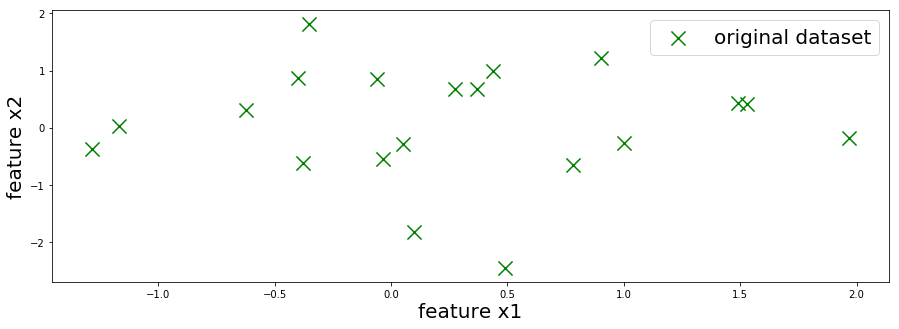

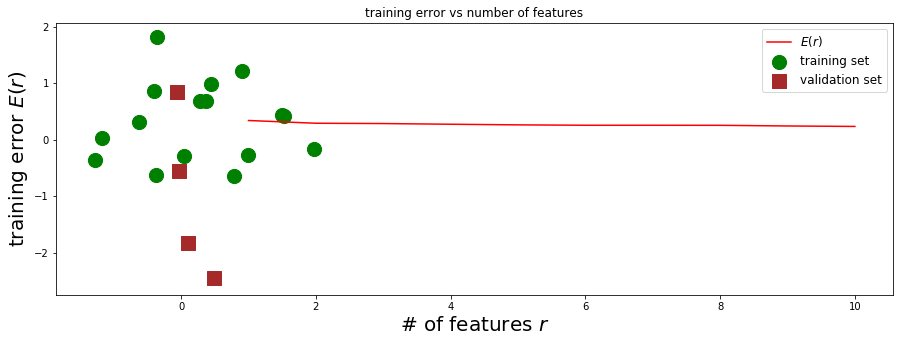

In [3]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

m = 20                        # we use the first m=20 data points from the house sales database 
n = 10                        # maximum number of features used 

X,y = GetFeaturesLabels(m,n)  # read in m data points using n features 
linreg_error = np.zeros(n)    # vector for storing the training error of LinearRegresion.fit() for each r

for r_minus_1 in range(n):  # loop over number of features r (minus 1)
    reg = LinearRegression(fit_intercept=False)   # create an object for linear predictors
    reg = reg.fit(X[:,:(r_minus_1 + 1)], y)                 # find best linear predictor (minimize training error)
    pred = reg.predict(X[:,:(r_minus_1 + 1)])               # compute predictions of best predictors 
    linreg_error[r_minus_1] = mean_squared_error(y, pred) # compute training error 

plot_x = np.linspace(1, n, n, endpoint=True)      # plot_x contains grid points for x-axis

# Plot training error E(r) as a function of feature number r
plt.rc('legend', fontsize=12)
plt.plot(plot_x, linreg_error, label='$E(r)$', color='red')
plt.xlabel('# of features $r$')
plt.ylabel('training error $E(r)$')
plt.title('training error vs number of features')
plt.legend()
plt.show()

### Let's Interpret the Results!

Based on the above plot, we could argue that we should choose the linear model with $r=10$ features, since this yields the lowest training error $E(r)$. **This reasoning is incorrect**, since our ultimate goal is to find a predictor for new data points (new real-estates). Our goal is not to reproduce accurately the prices of previous house sales! 

Using the training error $E_{\rm train}(r)$ to assess the quality of the predictor $h_{\rm opt}^{(r)}$ is misleading since $h_{\rm opt}^{(r)}$ is based on the weight vector $\mathbf{w}$ and intercept that is perfectly tuned to the training data $\mathbb{X}^{(t)}$. Also, the more features (larger $r$) we use, the better we will be able to fit the training data $\mathbb{X}^{(t)}$ (obtain smaller training error). However, this does not necessarily lead to better performance on new data. A complex model with too many features (large $r$) might only fit the training data very well, and generalize poorly to new data.

Consider the case of $r=m_{\rm train}$, i.e., the number of features is the same as the number of labeled data points in the training set. Under very mild conditions it can be shown that in this case there always exists a linear predictor $h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ such that $y^{(i)} = h(\mathbf{x}^{(i)})$, i.e., the training error is exactly zero (see Chapter 7.1 of the course book)! 
A better way to evaluate the quality of a predictor is presented next. 

##  The Right Way

The training error $E_{\rm train}(r)$ is a bad measure for the quality of a hypothesis space $\mathcal{H}^{(r)}$ since it will always favor larger spaces (larger number $r$ of features). A more useful measure for the quality of a hypothesis space $\mathcal{H}^{(r)}$ is the validation error 
\begin{equation}
E_{\rm val}(r) = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(r)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}. 
\end{equation} 
Here, the predictor $h_{\rm opt}$ is obtained by minimizing the training error over all linear predictors using $r$ features: 
\begin{equation}
 h^{(r)}_{\rm opt} = {\rm argmin}_{h \in \mathcal{H}^{(r)}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)})\big)^{2}.
\end{equation}
Since each predictor function $h \in \mathcal{H}^{(r)}$ is given by $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ we can find the optimal predictor via the optimum weight and intercept 
\begin{equation}
\mathbf{w}_{\rm opt} = {\rm argmin}_{\mathbf{w}\in \mathbb{R}^{r}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)} \big)^{2}. 
\end{equation} 

<a id='splitTestandValidationfunction'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Generate Training and Validation Set.
   
Use the `scikit-learn` library function `train_test_split()` to split the data points obtained from the function `GetFeaturesLabels` into a training and validation set. The function should be used with the choice `random_state=2` and `test_size=0.2`. 
</div>

In [4]:
from sklearn.model_selection import train_test_split # Import train_test_split function

m = 20                        # we use the first m=20 data points from the house sales database 
n = 10                        # maximum number of features used 

X,y = GetFeaturesLabels(m,n)  # read in m data points using n features 

### STUDENT TASK ###
# Compute the training and validation sets
# X_train, X_val, y_train, y_val = ...
### BEGIN SOLUTION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2) # 80% training and 20% test
### END SOLUTION

In [5]:
# Check dimensions of train and validation vectors

assert len(X_train) == (16), "The 'x_train' vector has the wrong length"
assert len(y_train) == (16), "The 'y_train' vector has the wrong length"
assert len(X_val) == (4),   "The 'x_val' vector has the wrong length"
assert len(y_val) == (4), "The 'y_val' vector has the wrong length"
print('Sanity checks passed!')

Sanity checks passed!


<a id='trainValErrorsfunction'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Compute Training and Validation Error. 

Compute the training error and validation error for each choice of $r=1,\ldots,n$. The training errors should be stored in a numpy array `err_train` of shape (n,1) and the validation errors should be stored in the numpy array `err_val` of shape (n,1). The first entries of `err_train` and `err_val` should be $E_{\rm train}(1)$ and $E_{\rm val}(1)$. 

Store the optimum number $r$ of features (such that the validation error is smallest) in the variable `best_model`. 

Hint: you can determine the index of the smallest entry in a numpy array using `np.argmin()` [see documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argmin.html)
</div>

In [6]:
err_train = np.zeros([n,1]) 
err_val = np.zeros([n,1])
    

for r_minus_1 in range(n):
### STUDENT TASK ###
### BEGIN SOLUTION
    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg = lin_reg.fit(X_train[:,:(r_minus_1+1)], y_train)
    w_opt = lin_reg.coef_
    y_pred_train = lin_reg.predict(X_train[:,:(r_minus_1+1)])
    err_train[r_minus_1] = mean_squared_error(y_train, y_pred_train)
    y_pred_val = lin_reg.predict(X_val[:,:(r_minus_1+1)])
    err_val[r_minus_1] = mean_squared_error(y_val, y_pred_val)
### END SOLUTION


# best_model = ...
### BEGIN SOLUTION
best_model = np.argmin(err_val)+1
print(best_model)
### END SOLUTION


2


In [7]:
# Some sanity checks 
print(err_train.shape)
assert err_train.shape == (n,1), "numpy array err_train has wrong shape"
assert err_val.shape == (n,1), "numpy array err_val has wrong shape"
assert best_model != None, "Please choose a value between 1 and n "
assert best_model < n, "The values should be less than n"
assert best_model > 0, "The values should be more than 0"
print('Sanity checks passed!')

### BEGIN HIDDEN TESTS
err_train_test = np.zeros([n,1])
err_val_test = np.zeros([n,1])
for r in range(n):
    lin_reg_test = LinearRegression(fit_intercept=False)
    lin_reg_test = lin_reg.fit(X_train[:,:(r+1)], y_train)
    y_pred_train_test = lin_reg_test.predict(X_train[:,:(r+1)])
    err_train_test[r] = mean_squared_error(y_train, y_pred_train_test)
    y_pred_val_test = lin_reg_test.predict(X_val[:,:(r+1)])
    err_val_test[r] = mean_squared_error(y_val, y_pred_val_test)
    
np.testing.assert_allclose(err_train_test, err_train, atol=1e-3, err_msg='trainValErrors is not correctly calculating the training_errors')
np.testing.assert_allclose(err_val_test, err_val, atol=1e-3, err_msg='trainValErrors is not correctly calculating the training_errors')
best_model_test = np.argmin(err_val_test)+1
assert best_model == best_model_test, "The value for the best model based on validation error should be 2"

### END HIDDEN TESTS


(10, 1)
Sanity checks passed!


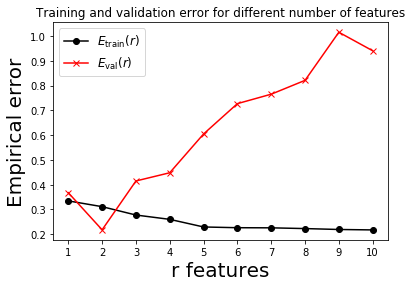

[[0.36765195]
 [0.21796853]
 [0.41507308]
 [0.44818207]]


In [8]:
# Plot the training and validation errors for the different number of features r

plt.plot(range(1, n + 1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')
plt.plot(range(1, n + 1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')

plt.title('Training and validation error for different number of features')
plt.ylabel('Empirical error')
plt.xlabel('r features')
plt.xticks(range(1, n + 1))
plt.legend()
plt.show()

print(err_val[:4])


## K-fold Cross-Validation

In general, there is no unique optimal way of splitting a data set into training and validation set. The precise choice of how to divide data points into training and validation set and also their relative size (80/20, 50/50 ...) has to be considered case-by-case for the application at hand. 

To get more guidance on how to split the data, one typically needs to have additional knowledge about the statistical properties of the data generating process. Given an accurate probabilistic model for the data points, allows determining optimal split ratios between training and validation set. Probabilistic (generative) models for the observed data points is beyond the scope of this course. 

Using only a single split of the data into training and validation set bears the risk of being extremely "unlucky". The single split might result in a highly non-typical validation set such that the validation error is not reliable as a measure for the average loss on new data. $K$-fold cross-validation is a straightforward extension of the "single-split approach" making it more robust. 

$K$-fold cross-validation randomly splits the data into $K$ equal-sized subsets ("folds"). It then executes $K$ rounds, each round corresponding to one of the $K$ folds. In the $k$th round, the $k$th fold is used as validation set and the remaining $K-1$ folds are used as training set. The validation errors obtained during each fold are then averaged to obtain the final validation error. 

As an example, the diagram of a 5-fold cross-validation is depicted below. For each round, the fold which is used as validation set is indicated by "test". 

![Components](cross_validation_diagram.png)

<a id='kfold'></a>
<div class=" alert alert-info">
    <p><b>Demo.</b> K-Fold Cross Validation.</p>
    
The code snippet below peforms K-fold cross validation with $K=5$ for linear predictors using $r=2$ features. 

</div>   

In [9]:
# Import KFold class from scikitlearn library
from sklearn.model_selection import KFold

K=5    # number of folds/rounds/splits
kf = KFold(n_splits=K, shuffle=False)
kf = kf.split(X)
kf = list(kf)                 # kf is a list representing the rounds of k-fold CV

m = 20                        # we use the first m=20 data points from the house sales database 
n = 10                        # maximum number of features used 

X,y = GetFeaturesLabels(m,n)  # read in m data points with n features 
r=2    # we use only first two features for linear predictors h(x) = w^{T}x



train_errors_per_cv_iteration = []
test_errors_per_cv_iteration = []  

# for loop over K rounds 
        
for train_indices, test_indices in kf:
        
    reg = LinearRegression(fit_intercept=False)
    reg = reg.fit(X[train_indices,:(r+1)], y[train_indices])
    y_pred_train = reg.predict(X[train_indices,:(r+1)])
    train_errors_per_cv_iteration.append(mean_squared_error(y[train_indices], y_pred_train))
    y_pred_val = reg.predict(X[test_indices,:(r+1)])
    test_errors_per_cv_iteration.append(mean_squared_error(y[test_indices], y_pred_val))
            

err_train= np.mean(train_errors_per_cv_iteration) # compute the mean of round-wise training errors
err_val = np.mean(test_errors_per_cv_iteration)   # compute the mean of round-wise validation errors
        
print("Training error (averaged over 5 folds): ",err_train)
print("Validation error (averaged over 5 folds):", err_val)


Training error (averaged over 5 folds):  0.27420727178433746
Validation error (averaged over 5 folds): 0.3834472133921979


##  Regularization

In what follows, we stick to the hypothesis space $\mathcal{H}^{(n)}$ of linear predictors $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ using the maximum number $n$ of features. To find a good predictor function we could try to mininize the training error $E_{\rm train}$ over some training set $\mathbb{X}^{(t)}$. However, as discussed above, for large $n$ (i.e., if we have collected a large amount of features for a house) we will easily find a predictor function $h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ such that $E_{\rm train}$ is small but the predictor function will do poorly on data points different from $\mathbb{X}^{(t)}$. 

The idea of regularization is to somehow estimate (or approximate) the increase of the prediction error in new data which is different from the training set. This estimated (or anticipated) increase is represented by adding a **regularization term** to the training error: 
\begin{equation}
h^{(\lambda)}_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} \underbrace{(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2}}_{\mbox{ training error}} + \underbrace{\alpha \mathcal{R}(h)}_{\mbox{anticipated increase of error (loss) on new data}}.  
\end{equation}


The regularization term $\mathcal{R}(h)$ quantifies the anticipated increase in the validation error (compared to the training error) due to the "complexity" (e.g. the number of features used in a linear predictor) of a particular predictor. In a nutshell, the regularization term penalizes the use of more complex predictors and therefore favors "simpler" predictor functions. The precise meaning of "complexity" or "simpler" is determined by the (design) choice for the regularization term $\mathcal{R}(h)$. 

Two widely used choices for measuring the complexity of linear predictors $h(\mathbf{x}) = \mathbf{w}^{T}\mathbf{x}$ is the squared Euclidean norm $\mathcal{R}(h) = \|\mathbf{w}\|^{2}_{2}=\sum_{r=1}^{n} w_{r}^{2}$ or the $\ell_{1}$ norm $\mathcal{R}(h) = \|\mathbf{w}\|_{1}=\sum_{r=1}^{n} |w_{r}|$. 

The regularization parameter $\alpha$ offers a trade off between the prediction error (training error) incurred on the training data and the complexity of a predictor. The larger we choose $\alpha$, the more emphasis is put on obtaining "simple" predictor functions. Using very small values for $\alpha$ prefers predictor functions which achieve a small training error (at the expense of being a more complicated function). 

In order to actually implement regularization, we need to 
- choose (define) the function $\mathcal{R}(h)$ that quantifies some notion of complexity of a predictor function $h \in \mathcal{H}^{(n)}$. 
- choose the value of the regularization parameter $\lambda$. 

These two design choices can be based on validation. More precisely, 
- we propose a set of different choices for the function $\mathcal{R}(h)$ and regularization parameter $\alpha$, 
- for each choice for $\alpha$ and $\mathcal{R}(h)$, we learn a predictor that minimizes the regularized training error 

\begin{equation}
h^{(\alpha)}_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).    
\end{equation}
- evaluate the resulting predictor $h^{(\alpha)}_{\rm opt}$ by computing the validation error
\begin{equation}
E_{\rm val}^{(\alpha)} = (1/m_{\rm v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(\alpha)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}.
\end{equation} 

We then use the regularization measure $\mathcal{R}(h)$ and the value for $\alpha$ with smallest validation error $E_{\rm val}^{(\alpha)}$. 

<a id='ridgeReg'></a>
<div class=" alert alert-info">
    <p><b>Demo.</b> Ridge Regression. </p>

Ridge regression is obtained by linear regression, using linear predictor functions $h^{(\mathbf{w})}(\mathbf{x}) =\mathbf{w}^{T} \mathbf{x}$, with the regularization term $\mathcal{R}(h)=\|\mathbf{w}\|_{2}^{2}$. The optimal weight vector $\mathbf{w}_{\rm opt}$ can be found using the Python function `Ridge.fit()`. 

[see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

</div>  

In [10]:
from sklearn.linear_model import Ridge
alpha_scaled = 2*n 

ridge = Ridge(alpha=alpha_scaled, fit_intercept=True)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_train)
w_opt = ridge.coef_
err_train = mean_squared_error(y_pred, y_train)

# Print optimal weights and training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', err_train)

Optimal weights: 
 [[ 0.24110883 -0.22076067 -0.12888964  0.02009444 -0.04235676 -0.01655399
  -0.03795704 -0.00459253 -0.01375981 -0.02381325]]
Training error: 
 0.3694434471547521


<a id='lassoReg'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Lasso Regression.

The Lasso estimator is obtained by regularizing the training error of linear predictors $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ with the complexity measure $\mathcal{R}(h)= \|\mathbf{w}\|_{1}$. Use the Python function `Lasso.fit()` to compute the optimal predictor for $\alpha=1$. 

Note that the Python function uses a different scaling of the training error ($1/(2m_{t})$ instead of $1/m_{t}$). Make sure you transform the value $\alpha$ so that the Python function solves the regularized problem  
\begin{equation}
h^{(\alpha)}_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).    
\end{equation}

[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

</div>

In [24]:
from sklearn.linear_model import Lasso


X,y = GetFeaturesLabels(m,n)  # read in m data points using n features 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2) # 80% training and 20% test
alpha_val = 1

# .
# .
# .
# w_opt = ...
# training_error = ...
### BEGIN SOLUTION
lasso = Lasso(alpha=alpha_val/2, fit_intercept=False)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_train)
w_opt = lasso.coef_
training_error = mean_squared_error(y_pred, y_train)
### END SOLUTION 

# Print optimal weights and the corresponding training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', training_error)

Optimal weights: 
 [ 0.10085404 -0.13397314 -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.        ]
Training error: 
 0.64205177534816


In [12]:
# Perform some sanity checks on the outputs
assert w_opt.shape == (10,), "'w_opt' has wrong shape"
assert np.isscalar(training_error), "'training_error' is not scalar"
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
def t_fitLasso(x_train, y_train, lambd=0):
    lasso = Lasso(alpha=lambd/2, fit_intercept=False)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_train)
    w_opt = lasso.coef_
    training_error = mean_squared_error(y_pred, y_train)
    return w_opt, training_error

t_w_opt, t_training_error = t_fitLasso(X_train, y_train, lambd=1)

np.testing.assert_allclose(t_w_opt, w_opt, rtol=1e-10, atol=0)
np.testing.assert_almost_equal(t_training_error, training_error)
### END HIDDEN TESTS

Sanity check tests passed!


When using Lasso or ridge regression, we need to find a suitable value for the regularization parameter $\alpha$. A simple but useful approach is **grid search**: We first specify a list of values to be used for the regularization parameter. For each value $\alpha$, we determine a predictor $h^{(\alpha)}$ by minimizing the regularized training error: 
\begin{equation}
h^{(\alpha)}  = {\rm argmin}_{h \in \mathcal{H}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).    
\end{equation}
The resulting training error is 
\begin{equation} 
E_{\rm train}(\alpha) = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h^{(\alpha)}(\mathbf{x}^{(i)}) \big)^{2}. 
\end{equation}
Note that the training error $E_{\rm train}(\alpha)$ is measured on the training data $\mathbb{X}^{t}$ which was also used to tune the predictor $h^{(\alpha)}$ (in the above opimtization problem). Therefore, $E_{\rm train}(\alpha)$ is too optimistic as a measure for the average error of $h^{(\alpha)}$ on new data points. Instead, we will measure the quality of $h^{(\alpha)}$ via the validation error  
\begin{equation} 
E_{\rm val}(\alpha) = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(\alpha)}(\mathbf{x}^{(i)}) \big)^{2} 
\end{equation}
incurred by the predictor $h^{(\alpha)}$ on the validation set $\mathbb{X}^{(v)}$. We then choose the value $\alpha$ resulting in the smallest validation error $E_{\rm val}(\alpha)$. This grid search can be computationally expensive since we have to solve a separate optimization problem (of minimizing the regularized training error) for each value of $\alpha$. 

<a id='lassoParameter'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Tuning Lasso Parameter.
    
Compute the Lasso estimator $h^{(\alpha)}$ for each value $\alpha$ from the list $\alpha^{(1)},\ldots,\alpha^{(9)}$ defined in the code snippet below (numpy array `alpha_values`). Store the resulting validation errors $E_{\rm val}(\alpha^{(i)})$ and training errors $E_{\rm train}(\alpha^{(i)})$ in the numpy array `err_val` of shape (9,1) and `err_train` of shape (9,1). The first entry `err_val[0]` should be $E_{\rm val}(\alpha^{(1)})$, and so on. For the optimal choice $\alpha^{(i)}$ (yielding smallest validation error), store the weight vector of the optimal predictor in the numpy array `w_opt` of shape (n,1). 

[scikit-learn function for Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) 

Hint: Note that the input parameter `alpha` of the Python function `Lasso.fit()` is $\alpha/2$ with $\alpha$ being the regularization parameter in the optimization problem above.   

</div>

In [13]:
# Specify a list of values for lambda to be considered
alpha_values = np.array([0.0001, 0.001, 0.01, 0.05, 0.2, 1, 3, 10, 10e3])
nr_values = len(alpha_values)
err_val = np.zeros([nr_values,1])
err_train = np.zeros([nr_values,1])
### STUDENT TASK ###
### BEGIN SOLUTION
for l in range(nr_values):
    lasso = Lasso(alpha=alpha_values[l]/2, fit_intercept=False)
    lasso = lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    err_train[l] = mean_squared_error(y_train_pred, y_train)
    y_val_pred = lasso.predict(X_val)
    err_val[l]=mean_squared_error(y_val_pred, y_val)
    
best_alpha_idx=np.argmin(err_val)
lasso = Lasso(alpha=alpha_values[best_alpha_idx]/2, fit_intercept=False)
lasso = lasso.fit(X_train, y_train)
w_opt = lasso.coef_
w_opt = w_opt.reshape(-1,1)
### END SOLUTION

In [14]:
# Perform some sanity checks on the outputs
assert len(w_opt) == 10, "'w_opts' has wrong shape"
assert len(err_train) == 9, "'w_opts' has wrong shape"
assert len(err_val) == 9, "'w_opts' has wrong shape"
print('Sanity check tests passed!')



### BEGIN HIDDEN TESTS
t_err_val = np.zeros([nr_values,1])
t_err_train = np.zeros([nr_values,1])
for l in range(nr_values):
    lasso = Lasso(alpha=alpha_values[l]/2, fit_intercept=False)
    lasso = lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    t_err_train[l] = mean_squared_error(y_train_pred, y_train)
    y_val_pred = lasso.predict(X_val)
    t_err_val[l]=mean_squared_error(y_val_pred, y_val)

best_alpha_idx=np.argmin(err_val)
lasso = Lasso(alpha=alpha_values[best_alpha_idx]/2, fit_intercept=False)
lasso = lasso.fit(X_train, y_train)
t_w_opt = lasso.coef_
t_w_opt = w_opt.reshape(-1,1)
    
np.testing.assert_allclose(t_w_opt, w_opt, rtol=1e-10, atol=0)
np.testing.assert_allclose(t_err_val, err_val, rtol=1e-10, atol=0)
np.testing.assert_allclose(t_err_train, err_train, rtol=1e-10, atol=0)
### END HIDDEN TESTS


Sanity check tests passed!


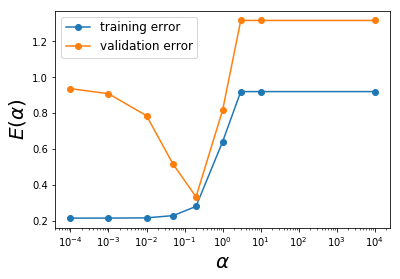

In [15]:

# Plot the training and validation errors
plt.plot(alpha_values, err_train, marker='o', label='training error')
plt.plot(alpha_values, err_val, marker='o', label='validation error')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$E(\alpha)$')
plt.legend()
plt.show()

## Take Home Quiz

Answer the following questions by setting, for each question, the variable `answer_R4_Q??` to the index of the correct answer. E.g. if you think that the second answer in the first quiz question is the right one, then set `answer_R4_Q1=2`. 

<a id='QuestionR4_1'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question R4.1. </p>

 <p>What is the goal of model selection in machine learning?</p>

<ol>
  <li> To choose (learn) the optimal predictor function $h_{\rm opt}$ out of a given hypothesis space (model) $\mathcal{H}$.</li>
  <li> To select the most suitable car model using machine learning methods.</li>
  <li> To select the optimal weights used for regularization.</li>
  <li> To select the best hypothesis space out of a set of candidates $\lbrace \mathcal{H}^{(1)}, \mathcal{H}^{(2)}, \ldots,\mathcal{H}^{(n)} \rbrace$.</li>
</ol> 

</div>

In [16]:
# answer_R4_Q1  = ...
### BEGIN SOLUTION
answer_R4_Q1 = 4
### END SOLUTION

In [17]:
# this cell is for tests
assert answer_R4_Q1 in [1,2,3,4], '"answer_R4_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q1 in [1,2,3,4], '"answer_R4_Q1" Value should be an integer between 1 and 4.'
assert answer_R4_Q1 == 4, ' "answer_R4_Q1" Correct answer is 4.'
### END HIDDEN TESTS

Sanity check tests passed!


<a id='QuestionR4_2'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question R4.2. </p>

 <p>What is a good measure for the prediction error (loss) incurred by a predictor function $h(\mathbf{x})$ on new data points?</p>
<ol>
  <li> The empirical error (average loss) of $h(\mathbf{x})$ on the <b>training set</b> which is also used to tune $h(\mathbf{x})$. </li>
  <li> The empirical error (average loss) of $h(\mathbf{x})$ on some <b>validation set</b> which is different from the training set. 
</ol> 

</div>

In [18]:
# answer_R4_Q2  = ...
### BEGIN SOLUTION
answer_R4_Q2 = 2
### END SOLUTION

In [19]:
# this cell is for tests
assert answer_R4_Q2 in [1,2], '"answer_R4_Q2" Value should be an integer between 1 and 2.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q2 in [1,2], '"answer_R4_Q2" Value should be an integer between 1 and 2.'
assert answer_R4_Q2 == 2, ' "answer_R4_Q2" Correct answer is 2.'
### END HIDDEN TESTS

Sanity check tests passed!


<a id='QuestionR4_3'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question R4.3. </p>

Regularized linear regression amounts to finding the predictor $h(\mathbf{x})$ which minimizes the regularized training error 
\begin{equation} 
(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).
\end{equation}
Which statement is true?

<ol>
  <li> Using a large value for the regularization parameter $\alpha$ prefers predictors with large complexity $\mathcal{R}(h)$ but small training error.</li>
  <li>  Using a small value for the regularization parameter $\alpha$ prefers predictors with large complexity $\mathcal{R}(h)$ but small training error.</li>
  <li> For regularization parameter $\alpha=0$, the optimal predictor is always $h(\mathbf{x}) =0$. </li>
  <li> For regularization parameter $\alpha=0$, the optimal predictor is always $h(\mathbf{x}) =42$.</li>
</ol> 

</div>

In [20]:
# answer_R4_Q3  = ...
### BEGIN SOLUTION
answer_R4_Q3 = 2
### END SOLUTION

In [21]:
# this cell is for tests
assert answer_R4_Q3 in [1,2,3,4], '"answer_R4_Q3" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q3 in [1,2,3,4], '"answer_R4_Q3" Value should be an integer between 1 and 4.'
assert answer_R4_Q3 == 2, ' "answer_R4_Q3" Correct answer is 2.'
### END HIDDEN TESTS

Sanity check tests passed!
